In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys, os
os.environ['COBAYA_NOMPI'] = 'True'
sys.path.append('/global/cscratch1/sd/sfschen/boss_analysis_joint/lss_likelihood/')

%matplotlib inline

In [3]:
from cobaya.yaml          import yaml_load_file
from cobaya.samplers.mcmc import plot_progress
#
from getdist.mcsamples    import MCSamplesFromCobaya
from getdist.mcsamples    import loadMCSamples
import getdist.plots      as     gdplt
from cobaya.model import get_model

#
import os

Configuration Space vs. Fourier

In [4]:
pkz1_info = yaml_load_file("yamls/pk_z1_lnA.yaml")

pkz1_samples = loadMCSamples(os.path.abspath(pkz1_info["output"]),\
                        settings={'ignore_rows':0.5, 'contours': [0.68, 0.95]})

In [5]:
pkz3_info = yaml_load_file("yamls/pk_z3_lnA.yaml")

pkz3_samples = loadMCSamples(os.path.abspath(pkz3_info["output"]),\
                        settings={'ignore_rows':0.5, 'contours': [0.68, 0.95]})

In [6]:
xi1path = '/global/cscratch1/sd/mwhite/Fitting/CobayaLSS/chains/boss_s01_z038_lcdm_xi'
xiz1_samples = loadMCSamples(xi1path,\
                        settings={'ignore_rows':0.5, 'contours': [0.68, 0.95]})

In [7]:
xi3path = '/global/cscratch1/sd/mwhite/Fitting/CobayaLSS/chains/boss_s01_z061_lcdm_xi'
xiz3_samples = loadMCSamples(xi3path,\
                        settings={'ignore_rows':0.5, 'contours': [0.68, 0.95]})

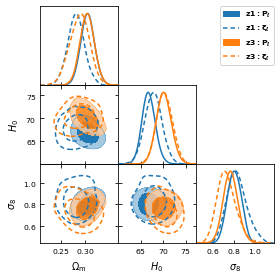

In [8]:
# Plot Together!
gdplot = gdplt.get_subplot_plotter()
gdplot = gdplt.get_subplot_plotter(width_inch=4)
gdplot.settings.axes_fontsize=12
gdplot.settings.legend_fontsize=12

gdplot.triangle_plot([pkz1_samples, xiz1_samples, pkz3_samples, xiz3_samples],\
                     ["omegam","H0","sigma8"],\
                     filled=[True,False,True,False],\
                     contour_lws=1.5,\
                     contour_args=[{'color':'C0','ls':'-'},{'color':'C0','ls':'--'},\
                                {'color':'C1','ls':'-'},{'color':'C1','ls':'--'}],\
                     line_args=[{'color':'C0','ls':'-'},{'color':'C0','ls':'--'},
                                {'color':'C1','ls':'-'},{'color':'C1','ls':'--'}],
                     linewidth_contour=3,\
                     legend_labels = [r"$\bf{z1}: P_\ell$",r"$\bf{z1}: \xi_\ell$",r"$\bf{z3}: P_\ell$",r"$\bf{z3}: \xi_\ell$"])

plt.savefig('Figures/pkxi_consistency.pdf')